### Libraries

In [22]:
# Required Python libraries
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from requests_html import HTMLSession, HTML

### Collect rss feeds

In [55]:
def getDataFromRSSFeed(url): 
    session = HTMLSession()
    r = session.get('https://www.spiegel.de/schlagzeilen/index.rss')

    # Parse the content using requests_html.HTML
    xml = HTML(html=r.content)

    # Find all item elements in the RSS feed
    items = xml.find('item')

    # Extract titles and links
    data = []
    for item in items:
        title = item.find('title', first=True).text
        link = item.find('link', first=True).text
        data.append({'title': title, 'link': link})
    return data;

# Create a DataFrame from the extracted data
data = getDataFromRSSFeed('https://www.spiegel.de/schlagzeilen/index.rss');
data.__add__(getDataFromRSSFeed('https://www.nzz.ch/international.rss'));
data.__add__(getDataFromRSSFeed('https://rss.nytimes.com/services/xml/rss/nyt/Europe.xml'));
data.__add__(getDataFromRSSFeed('https://rss.nytimes.com/services/xml/rss/nyt/World.xml'));
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

/Users/ivesbrunner/anaconda3/envs/spenv/lib/python3.10/html/parser.py:170: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  k = self.parse_starttag(i)


                                                title link
0   Oscarnominiertes Drama »Ich Capitano« von Matt...     
1                     KfW senkt Zinsen – ein bisschen     
2   Philipp Amthor plant Comeback als CDU-Generals...     
3   DDR-Diktator Walter Ulbricht: »Müssen wir wirk...     
4   Benzinpreise steigen dritte Woche in Folge krä...     
5   Tausende Südkoreaner verabschieden chinesische...     
6   Schöninger Speere: Neue Erkenntnisse zu Steinz...     
7   Ex-Wirecard-Manager: Jan Marsalek lieferte Geh...     
8   Luis Rubiales: Ex-Fußballboss in Spanien festg...     
9   Juso-Chef Philipp Türmer kritisiert FDP: Arme ...     
10  John Sinclair ist tot: MC5-Entdecker und König...     
11  Simbabwe ruft Katastrophenzustand wegen Dürre aus     
12  Köln: RTL-Zentrale evakuiert wegen gefährliche...     
13  Tägliches Quiz beim SPIEGEL: 7 Fragen zum Allg...     
14  Dreifacher Welthandballer: Mikkel Hansen zieht...     
15  Cottbus: Innenministerium stuft Gewalt gegen S...   

In [56]:
# find the most frequent words in the titles with Counter
words = Counter()
for title in df['title']:
    words.update(title.lower().split())
print(words)

Counter({'in': 6, 'von': 4, 'ein': 3, 'an': 3, 'und': 3, '-': 3, '»ich': 2, 'neue': 2, 'philipp': 2, 'als': 2, 'aus': 2, 'dem': 2, 'folge': 2, 'der': 2, 'wegen': 2, 'vor': 2, 'gegen': 2, 'trump': 2, 'die': 2, 'war': 2, 'wieder': 2, 'auf': 2, 'oscarnominiertes': 1, 'drama': 1, 'capitano«': 1, 'matteo': 1, 'garrone:': 1, 'helden': 1, 'kfw': 1, 'senkt': 1, 'zinsen': 1, '–': 1, 'bisschen': 1, 'amthor': 1, 'plant': 1, 'comeback': 1, 'cdu-generalsekretär': 1, 'mecklenburg-vorpommern': 1, 'ddr-diktator': 1, 'walter': 1, 'ulbricht:': 1, '»müssen': 1, 'wir': 1, 'wirklich': 1, 'jeden': 1, 'dreck': 1, 'westen': 1, 'kopieren?«': 1, 'benzinpreise': 1, 'steigen': 1, 'dritte': 1, 'woche': 1, 'kräftig': 1, 'tausende': 1, 'südkoreaner': 1, 'verabschieden': 1, 'chinesischen': 1, 'panda': 1, 'schöninger': 1, 'speere:': 1, 'erkenntnisse': 1, 'zu': 1, 'steinzeit-waffen': 1, 'werkzeugen': 1, 'ex-wirecard-manager:': 1, 'jan': 1, 'marsalek': 1, 'lieferte': 1, 'geheim-laptop': 1, 'russische': 1, 'agenten': 1, 

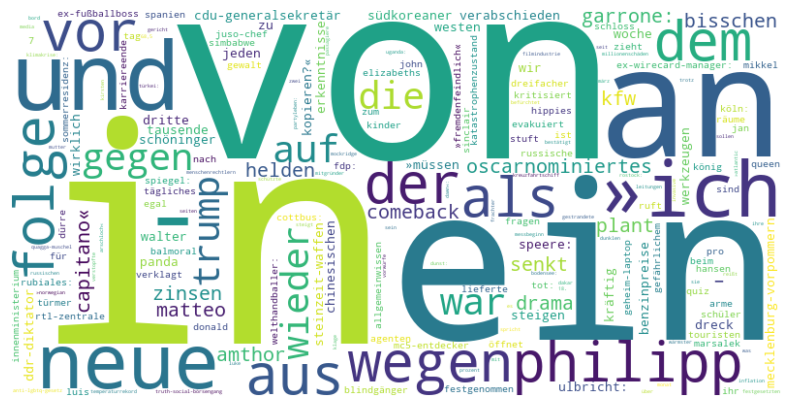

In [57]:
# create a word cloud from all titles
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(words)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()